In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

# **Import Data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bank_Churn_Modelling.csv')

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


# **Data Understanding**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9997 non-null   object 
 6   Age              9997 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             3
Age                3
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
nan_age = df[df['Age'].isnull()]
nan_gen = df[df['Gender'].isnull()]

print(nan_age)
print('------------')
print(nan_gen)

      RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
1698       1699    15807595    Ijendu          485   Germany    Male  NaN   
1830       1831    15572467  Chandler          506    France    Male  NaN   
1955       1956    15779176      Dike          565   Germany  Female  NaN   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
1698       7  144244.59              2          1               0   
1830       5       0.00              2          1               1   
1955       3  108888.24              3          0               1   

      EstimatedSalary  Exited  
1698         51113.14       0  
1830        127543.81       0  
1955        135875.51       1  
------------
     RowNumber  CustomerId    Surname  CreditScore Geography Gender   Age  \
576        577    15761986     Obialo          439     Spain    NaN  32.0   
726        727    15673570      Olsen          580    France    NaN  37.0   
914        915    15710404  Chinwendu     

In [ ]:
df['Age'].unique()

array([ 42.,  41.,  39.,  43.,  44.,  50.,  29.,  27.,  31.,  24.,  34.,
        25.,  35.,  45.,  58.,  32.,  38.,  46.,  36.,  33.,  40.,  51.,
        61.,  49.,  37.,  19.,  66.,  56.,  26.,  21.,  55.,  75.,  22.,
        30.,  28.,  65.,  48.,  52.,  57.,  73.,  47.,  54.,  72.,  20.,
        67.,  79.,  62.,  53.,  80.,  59.,  68.,  23.,  60.,  70.,  63.,
        64.,  18.,  82.,  69.,  74.,  71., 340.,  76., 380., 650., 400.,
        77.,  nan,  88.,  85.,  84.,  78.,  81.,  92.,  83.])

In [ ]:
df['Gender'].unique()

array(['Female', 'Male', 'M', 'F', nan], dtype=object)

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,9997.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,39.078223,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,13.453129,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,650.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# **Data Cleaning**

**Removing Missing Value**

In [ ]:
#Menghapus data kosong Age dan Gender
print("Data kosong Age dan Gender\t: ", df.isna().any(axis = 1).sum())

df = df.dropna()

print("Data kosong sekarang\t: ", df.isnull().any(axis = 1).sum())

Data kosong Age dan Gender	:  6
Data kosong sekarang	:  0


In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Handling Outlier**

In [ ]:
#Mengganti nilai Outlier pada Age
df.loc[df['Age'] == 340, 'Age'] = 34
df.loc[df['Age'] == 380, 'Age'] = 38
df.loc[df['Age'] == 400, 'Age'] = 40
df.loc[df['Age'] == 650, 'Age'] = 65

df['Age'].unique()

array([42., 41., 39., 43., 44., 50., 29., 27., 31., 24., 34., 25., 35.,
       45., 58., 32., 38., 46., 36., 33., 40., 51., 61., 49., 37., 19.,
       66., 56., 26., 21., 55., 75., 22., 30., 28., 65., 48., 52., 57.,
       73., 47., 54., 72., 20., 67., 79., 62., 53., 80., 59., 68., 23.,
       60., 70., 63., 64., 18., 82., 69., 74., 71., 76., 77., 88., 85.,
       84., 78., 81., 92., 83.])

In [ ]:
#Mengganti nilai Outlier pada Gender
df.loc[df['Gender'] == "F", 'Gender'] = "Female"
df.loc[df['Gender'] == "M", 'Gender'] = "Male"

df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

**Handling Data Type**

In [ ]:
#Men-convert tipe data Age dari Float ke Integer
df['Age'] = df['Age'].astype('int')

print(df['Age'].dtype)
print("-------------")
df.head()

int64
-------------


<ipython-input-15-0170df9242be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype('int')


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Checking Correlation between Variables

In [ ]:
# Menghitung matrix korelasi
correlation_matrix = df.corr()

# Menampilkan matrix korelasi
correlation_matrix

<ipython-input-33-00888f464df1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003827,0.000992,0.006517,0.012517,-0.005310,0.025656,-0.001389,-0.027295
Age,-0.003827,1.000000,-0.009911,0.028155,-0.031321,-0.011470,0.085466,-0.007185,0.285100
Tenure,0.000992,-0.009911,1.000000,-0.012195,0.013558,0.022592,-0.028614,0.007634,-0.013715
Balance,0.006517,0.028155,-0.012195,1.000000,-0.304284,-0.015082,-0.009762,0.012791,0.118517
NumOfProducts,0.012517,-0.031321,0.013558,-0.304284,1.000000,0.003716,0.009295,0.014229,-0.048326
HasCrCard,-0.005310,-0.011470,0.022592,-0.015082,0.003716,1.000000,-0.011565,-0.009958,-0.006783
IsActiveMember,0.025656,0.085466,-0.028614,-0.009762,0.009295,-0.011565,1.000000,-0.011785,-0.156364
EstimatedSalary,-0.001389,-0.007185,0.007634,0.012791,0.014229,-0.009958,-0.011785,1.000000,0.012001
Exited,-0.027295,0.285100,-0.013715,0.118517,-0.048326,-0.006783,-0.156364,0.012001,1.000000


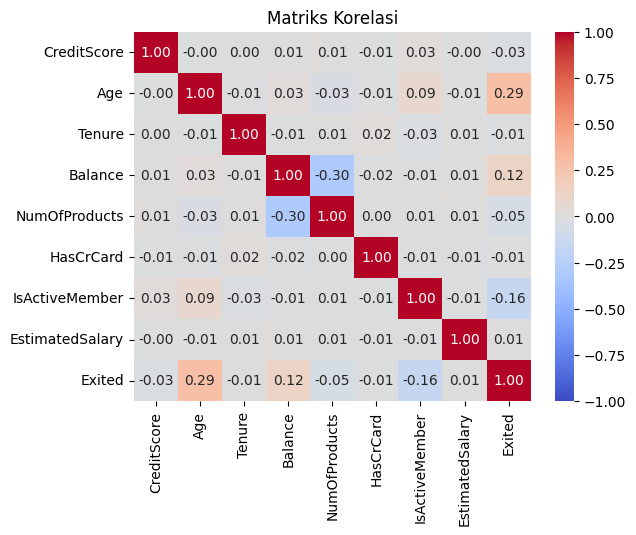

In [ ]:
# Plot Matrix Korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmax=1, vmin=-1)
plt.title('Matriks Korelasi')
plt.show()

# **Data Transformation**

**Drop Columns**

In [ ]:
print("Volume dataset sebelum drop kolom : ",df.shape)
drop_columns = ['RowNumber','CustomerId','Surname']
df.drop(drop_columns,axis=1,inplace=True)
print("Volume datase setelah drop kolom : ",df.shape)

Volume dataset sebelum drop kolom :  (9994, 14)
Volume datase setelah drop kolom :  (9994, 11)


**One Hot Encoding**

In [ ]:
categorical_columns = ['Geography','Gender']

# Menjalankan One Hot Encoding
one_hot_encoded = pd.get_dummies(df[categorical_columns])

# Concat kolom one-hot-encoding ke dataframe
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

#Drop kolom original kategorial
df_encoded.drop(categorical_columns,axis=1,inplace=True)

In [ ]:
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


**Normalization**

In [ ]:
continuous_columns = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_encoded[continuous_columns] = scaler.fit_transform(df_encoded[continuous_columns])

df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1,1,0


**Downsampled Data**

In [ ]:
from sklearn.utils import resample
#membuat dua dataframe berbeda majority dan minority class
df_majority = df_encoded[(df_encoded['Exited']==0)]
df_minority = df_encoded[(df_encoded['Exited']==1)]
# downsample majority class
df_majority_downsampled = resample(df_majority,
                                 replace=True,    # sample dengan replacement
                                 n_samples= 2036, # menyamakan minority class
                                 random_state=42)
# Gabung minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [ ]:
df_downsampled['Exited'].value_counts()

0    2036
1    2036
Name: Exited, dtype: int64

# **Model Building**

In [ ]:
#Train Test Split Menggunakan Data Downsampled
X = df_downsampled.drop('Exited',axis=1)
y = df_downsampled['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3257, 13)
(815, 13)
(3257,)
(815,)


In [ ]:
classifiers = [
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
]

# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
    # Perform cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

    # Calculate average performance metrics
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
    avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()
    avg_f1 = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro').mean()

    # Print the performance metrics
    print(f'Classifier: {clf_name}')
    print(f'Average Accuracy: {avg_accuracy:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print(f'Average F1: {avg_f1:.4f}')
    print('-----------------------')

Classifier: Random Forest
Average Accuracy: 0.7845
Average Precision: 0.7846
Average Recall: 0.7845
Average F1: 0.7824
-----------------------
Classifier: Decision Tree
Average Accuracy: 0.7283
Average Precision: 0.7289
Average Recall: 0.7276
Average F1: 0.7227
-----------------------


In [ ]:
def evaluate_model(y_test,y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))

    print("\n---------------------------------------------\n")
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap of the confusion matrix using Seaborn
    sns.heatmap(cm, annot=True, cmap='YlGnBu',fmt='.0f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()

**Decision Tree Model Evaluation**

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.73      0.73       408
           1       0.73      0.71      0.72       407

    accuracy                           0.72       815
   macro avg       0.72      0.72      0.72       815
weighted avg       0.72      0.72      0.72       815


---------------------------------------------



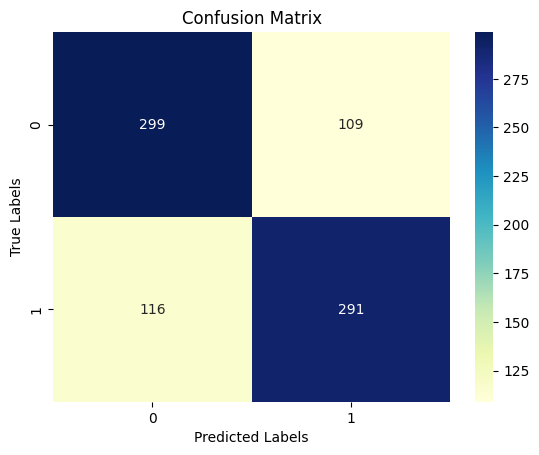

In [ ]:
# Creating the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=16)

# Training the classifier
dt_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)

**Random Forest Model Evaluation**

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       408
           1       0.80      0.75      0.78       407

    accuracy                           0.78       815
   macro avg       0.79      0.78      0.78       815
weighted avg       0.79      0.78      0.78       815


---------------------------------------------



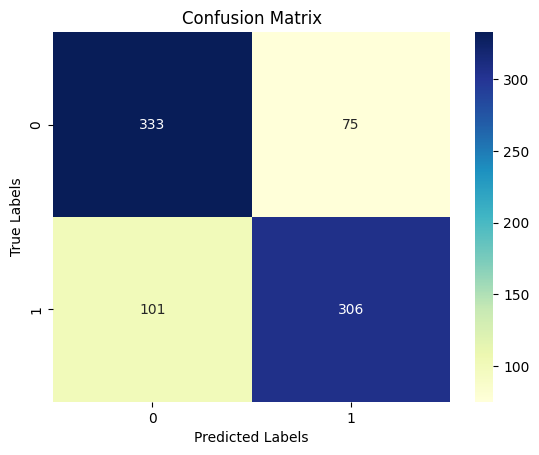

In [ ]:
# Creating the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Training the classifier
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)